# Solving a simple IVP using Python

Updated: 2025-02-19

The intention of this notebook is to solve a first-order differential equation using a built-in Python function called `solve_ivp`. The ODE studied is in Chapter 6 of the notes and given by 
$$
y'' = -\frac{1}{(1 + \epsilon y)^2},
$$
with initial conditions $y(0) = 0$ and $y'(0) = 1$. 

You will learn how to setup the solver in Python, and then how to plot the output on a dense mesh.

In [1]:
import numpy as np # matrices and vectors
import matplotlib.pyplot as plt # plotting
from scipy.integrate import solve_ivp # solver for IVPs

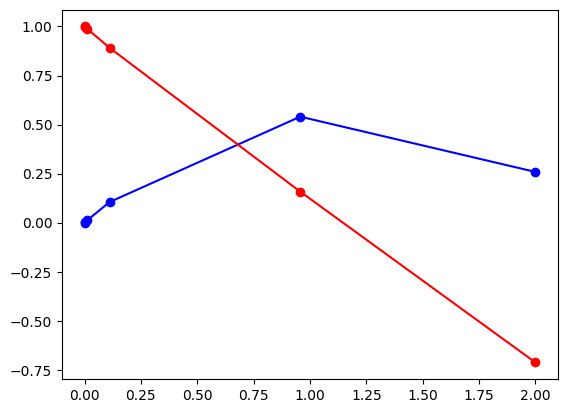

In [2]:
tmax = 2 # max time
ep = 0.2

# Define function for the ODE
def f(t, Y, ep):
    y, yp = Y
    ypp = -1/(1 + ep*y)**2
    return [yp, ypp]

# define the initial condition 
Y0 = [0, 1]

# solve the IVP
# define an auxiliary function with 2 arguments
fwd = lambda t, Y: f(t, Y, ep)
mysol = solve_ivp(fwd, [0, tmax], Y0, dense_output = True)

# Plot solution on the pre-determined ouputted mesh values
plt.plot(mysol.t, mysol.y[0], 'bo-')
plt.plot(mysol.t, mysol.y[1], 'ro-')

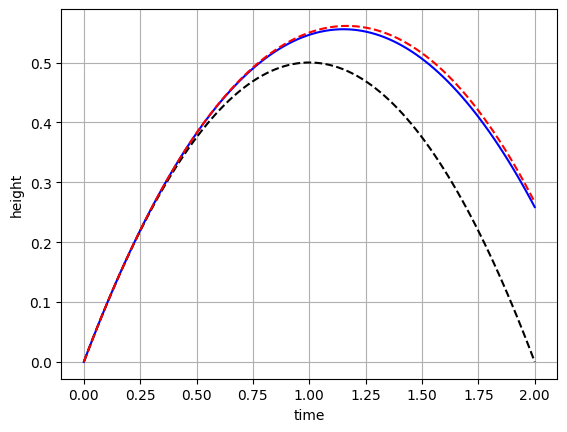

In [3]:
# Create a dense mesh of t values
tt = np.linspace(0, tmax, 100)
# Evaluate the solution structure on the above dense mesh
yy = mysol.sol(tt)
# Evaluate the asymptotic approximation y0 = -1/2 t^2 + t, y1 = -1/12 t^4 + 1/3 t^3 
y0 = -1/2*tt**2 + tt
y1 = -1/12*tt**4 + 1/3*tt**3
plt.plot(tt, yy[0], 'b-')
plt.plot(tt, y0, 'k--')
plt.plot(tt, y0 + ep*y1, 'r--')
plt.grid()
plt.xlabel('time');
plt.ylabel('height');